# 目的
2018/12/24 12:00 - 2019/01/03 12:00の期間について、１日ごとの最大利益を与える組 $(N_1,N_2)$ を解析し、その遷移になにかしらの意味があるのかどうかを調査する。   

## モジュールと関数の用意

In [1]:
from datetime import datetime
import glob
import itertools
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import numpy as np
import os
import pandas as pd
import pickle
# import sys
# sys.path.append("./")
from utils import *

%matplotlib inline

## データの読み込み

In [2]:
file_list = [
    "../data/minute/OHLC_20181211.csv",
]

df = None
for fpath in file_list:
    if df is None:
        df = pd.read_csv(fpath, index_col=0)
    else:
        df_ = pd.read_csv(fpath, index_col=0)
        df = pd.concat((df, df_))
df.head()

,Open,High,Low,Close,Date
0,729874,730119,729874,730000,2018-07-16T07:04:16.117
1,730002,730175,730002,730171,2018-07-16T07:05:20.477
2,730171,730503,730092,730446,2018-07-16T07:06:20.55
3,730422,730518,730345,730453,2018-07-16T07:08:50.733
4,730420,730509,730265,730335,2018-07-16T07:09:50.997


In [3]:
df.tail()

,Open,High,Low,Close,Date
159133,470707,471188,469350,469487,2018-11-23T05:12:56.59
159134,469556,469575,468234,468615,2018-11-23T05:13:56.417
159135,468380,468994,468000,468211,2018-11-23T05:14:56.773
159136,468308,468397,467227,467592,2018-11-23T05:15:56.49
159137,467984,468000,467446,467589,2018-11-23T05:16:15.693


In [4]:
len(df)

159138

## 前回の計算結果の読み込み

In [5]:
with open("../data/analysis_of_ohlc(201807-201811)-2_res.pickle", "rb") as ff:
    results = pickle.load(ff)

results.keys()

dict_keys(['results_list', 'results_list_best', 'N_max', 'comb_list', 'benefits_list', 'benefits_list_best', 'benefits_2d', 'benefits_best_2d', 'ary'])

## benefitsの取り出し

In [10]:
span = 24*60 # 1 day

length = 20000
N_span = length // span
if N_span * span == len(df):
    periods = N_span
else:
    periods = N_span + 1

comb_list = results["comb_list"]
results_main_list = results["results_list"]

N_max = results["N_max"]
benefits_main_period = np.zeros((periods, N_max + 1, N_max + 1, 2), dtype=int)

for jj in range(len(comb_list)):
    x, y = comb_list[jj]
    results_main = results_main_list[jj]
    a_k = results_main["a_k"]
    benefits = results_main["benefits"]
    for ii in range(periods):
        start = ii * span
        if ii == periods - 1:
            end = len(df)
        else:
            end = (ii + 1) * span
        
        index = (a_k[:, 0] >= start) & (a_k[:, 0] < end)
        benefits_main_period[ii, x, y, 0] = -((benefits[index])[a_k[index, 1] == -1]).sum() # dead
        benefits_main_period[ii, x, y, 1] = ((benefits[index])[a_k[index, 1] ==  1]).sum() # golden

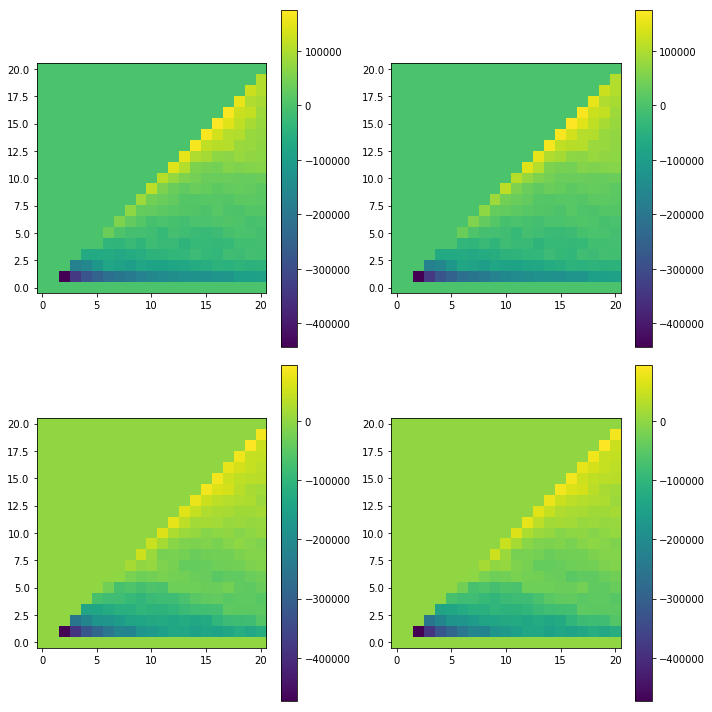

In [11]:
benefits_2d = results["benefits_2d"]

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(benefits_main_period[:, :, :, 0].sum(axis=0), origin="normal")
plt.colorbar()
plt.subplot(222)
plt.imshow(benefits_2d[:, :, 0], origin="normal")
plt.colorbar()
plt.subplot(223)
plt.imshow(benefits_main_period[:, :, :, 1].sum(axis=0), origin="normal")
plt.colorbar()
plt.subplot(224)
plt.imshow(benefits_2d[:, :, 1], origin="normal")
plt.colorbar()

plt.tight_layout()

In [12]:
print(np.where(benefits_2d.sum(axis=2)==benefits_2d.sum(axis=2).max()), benefits_2d.sum(axis=2).max())

(array([15], dtype=int64), array([16], dtype=int64)) 259158


In [13]:
benefits_main_period.shape[0]

14

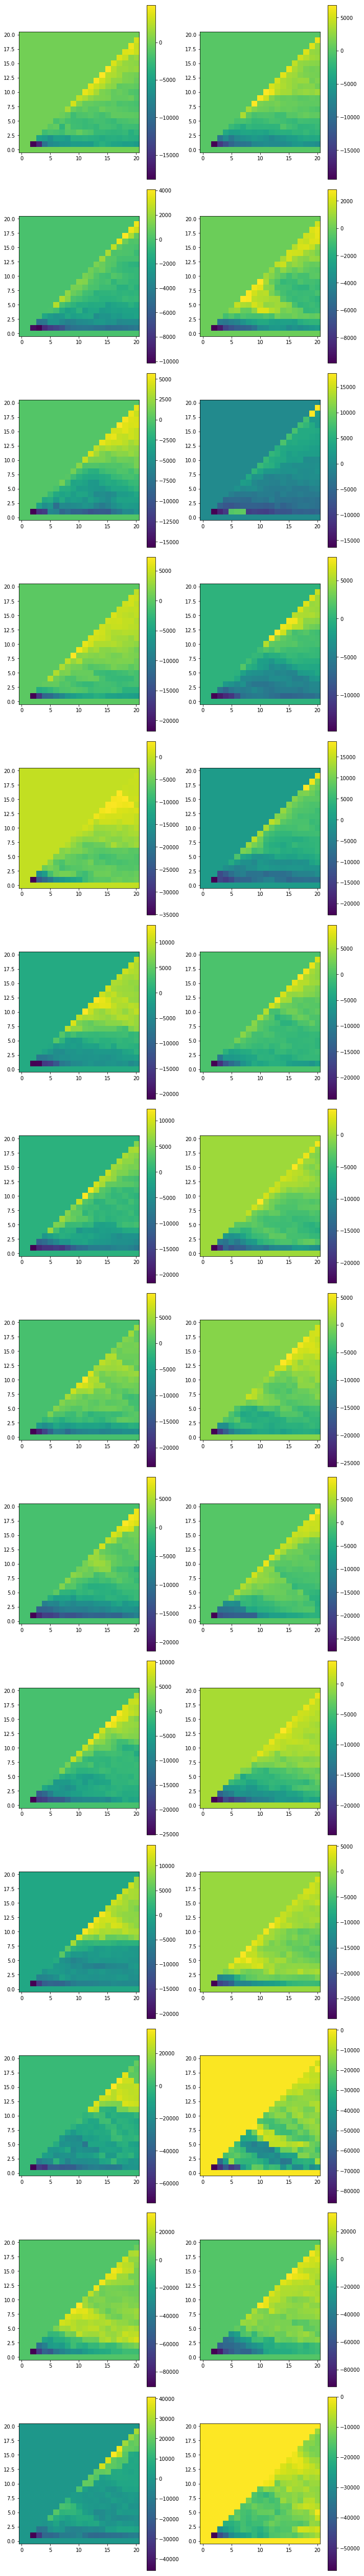

In [14]:
plt.figure(figsize=(10, benefits_main_period.shape[0]*5))

for ii in range(benefits_main_period.shape[0]):
    plt.subplot(benefits_main_period.shape[0], 2, 2 * ii + 1)
    plt.imshow(benefits_main_period[ii, :, :, 0], origin="normal")
    plt.colorbar()
    plt.subplot(benefits_main_period.shape[0], 2, 2 * ii + 2)
    plt.imshow(benefits_main_period[ii, :, :, 1], origin="normal")
    plt.colorbar()

plt.tight_layout()
plt.savefig("../images/analysis_of_ohlc(201807-201811)-3_res.png")

In [17]:
index = [15, 16]
benefits_max = []
for ii in range(benefits_main_period.shape[0]):
    _max =benefits_main_period[ii].sum(axis=2)[index[0], index[1]] 
    print(_max)
    benefits_max.append(_max)
print(sum(benefits_max))

7985
4179
11988
11197
13838
17413
11328
8974
13605
12187
14256
27964
64755
39489
259158


In [18]:
index = [17, 18]
benefits_max = []
for ii in range(benefits_main_period.shape[0]):
    _max =benefits_main_period[ii].sum(axis=2)[index[0], index[1]] 
    print(_max)
    benefits_max.append(_max)
print(sum(benefits_max))

9234
5984
12726
11906
18928
19318
10994
8328
15891
10905
14270
24865
54689
17613
235651


## max を与える index

In [19]:
indices_max = []
for ii in range(benefits_main_period.shape[0]):
    x, y = np.where(benefits_main_period[ii].sum(axis=2)==benefits_main_period[ii].sum(axis=2).max())
    print(x[0], y[0])
    indices_max.append([x[0], y[0]])

10 11
17 18
19 20
12 13
17 18
12 13
10 11
13 14
18 19
14 15
11 12
16 17
9 10
15 16


In [21]:
for index in indices_max:
    benefits_max = []
    for ii in range(benefits_main_period.shape[0]):
        _max =benefits_main_period[ii].sum(axis=2)[index[0], index[1]] 
        benefits_max.append(_max)
    print(index, sum(benefits_max))

[10, 11] 172190
[17, 18] 235651
[19, 20] 188736
[12, 13] 217157
[17, 18] 235651
[12, 13] 217157
[10, 11] 172190
[13, 14] 244559
[18, 19] 220873
[14, 15] 253102
[11, 12] 218417
[16, 17] 242300
[9, 10] 160528
[15, 16] 259158


## 結果の保存

In [20]:
res = dict(
    span=span, periods=periods, df_len=len(df), index=index, benefits_max=benefits_max, 
    indices_max=indices_max
)


with open("../data/analysis_of_ohlc(201807-201811)-3_res.pickle", "wb") as ff:
    pickle.dump(res, ff)

## まとめ
* １日ごとに区切って利益のマップを調査。
* 日によって最大をとる位置は異なるものの、 $N_1\geq 9, N_2 = N_1 + 1$ であれば利益は出る様子。
    + 分布的には、(17,18)がよさそう。
* 最大をとる位置とほかのパラメータの相関が取れるのならば、それに応じてスキームを変更するというのもありかもしれない。